In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\Downloads\Telco-Customer-Churn_XGboost.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.drop(['customerID'],axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.shape

(7043, 20)

In [6]:
df.columns=df.columns.str.replace(' ','_') # replace whitespace with _
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [8]:
len(df['TotalCharges'].unique())

6531

In [9]:
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [10]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [ ]:
df.loc[df['TotalCharges']==' ']

In [14]:
df.loc[df['TotalCharges']==' ','TotalCharges']=0

In [15]:
df.loc[df['TotalCharges']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [17]:
df.replace(' ','_',regex=True,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


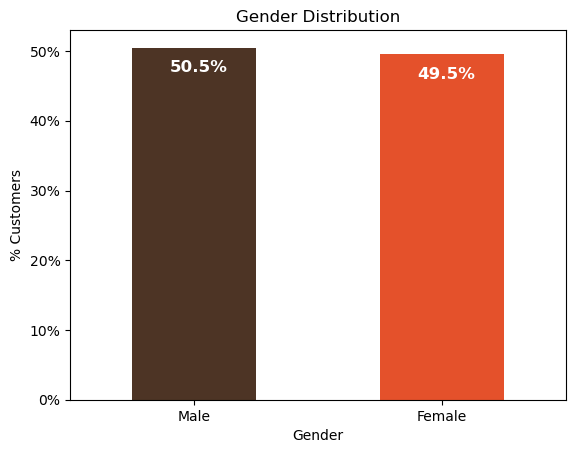

In [18]:
import matplotlib.ticker as mtick

colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

#create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

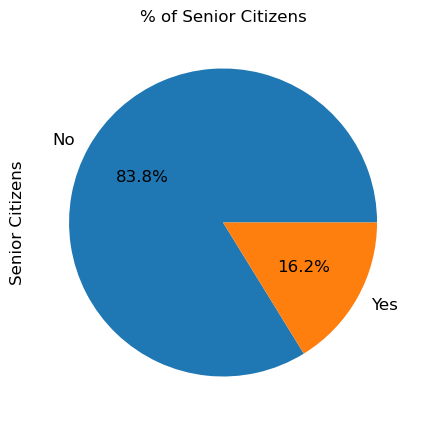

In [19]:
#% Senior Citizens -


ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Text(0.5, 1.0, '# of Customers by Contract Type')

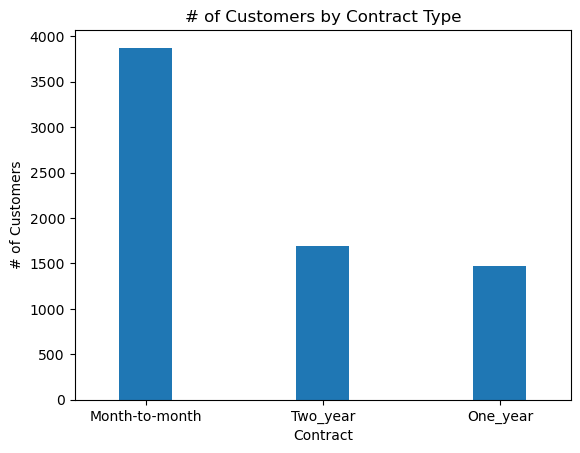

In [20]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

In [21]:
for item in df.columns:
    print(item)
    print(df[item].unique())

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No_phone_service' 'No' 'Yes']
InternetService
['DSL' 'Fiber_optic' 'No']
OnlineSecurity
['No' 'Yes' 'No_internet_service']
OnlineBackup
['Yes' 'No' 'No_internet_service']
DeviceProtection
['No' 'Yes' 'No_internet_service']
TechSupport
['No' 'Yes' 'No_internet_service']
StreamingTV
['No' 'Yes' 'No_internet_service']
StreamingMovies
['No' 'Yes' 'No_internet_service']
Contract
['Month-to-month' 'One_year' 'Two_year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic_check' 'Mailed_check' 'Bank_transfer_(automatic)'
 'Credit_card_(automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.

In [22]:
for item in df.columns:
    try:
        df[item]=df[item].str.lower()
    except Exception as e:
        print(item,'coudnt convert')
        print(e)

SeniorCitizen coudnt convert
Can only use .str accessor with string values!
tenure coudnt convert
Can only use .str accessor with string values!
MonthlyCharges coudnt convert
Can only use .str accessor with string values!
TotalCharges coudnt convert
Can only use .str accessor with string values!


In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [24]:
columns_to_convert=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for item in columns_to_convert:
    df[item].replace(to_replace='yes',value=1,inplace=True)
    df[item].replace(to_replace='no',value=0,inplace=True)
for item in df.columns:
    print(item)
    print(df[item].unique())

gender
['female' 'male']
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
[0 1]
MultipleLines
['no_phone_service' 'no' 'yes']
InternetService
['dsl' 'fiber_optic' 'no']
OnlineSecurity
['no' 'yes' 'no_internet_service']
OnlineBackup
['yes' 'no' 'no_internet_service']
DeviceProtection
['no' 'yes' 'no_internet_service']
TechSupport
['no' 'yes' 'no_internet_service']
StreamingTV
['no' 'yes' 'no_internet_service']
StreamingMovies
['no' 'yes' 'no_internet_service']
Contract
['month-to-month' 'one_year' 'two_year']
PaperlessBilling
[1 0]
PaymentMethod
['electronic_check' 'mailed_check' 'bank_transfer_(automatic)'
 'credit_card_(automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.

In [25]:
plt.figure(figsize=(7,5))
c=df.corr()
sns.heatmap(c,annot=True)
plt.title('Correlation matrix')
plt.show()

ValueError: could not convert string to float: 'female'

<Figure size 700x500 with 0 Axes>

In [26]:
df.corr()

ValueError: could not convert string to float: 'female'

In [27]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [28]:
ml_dumies=pd.get_dummies(df)
ml_dumies.fillna(value=0,inplace=True)
ml_dumies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_female,...,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes,Contract_month-to-month,Contract_one_year,Contract_two_year,PaymentMethod_bank_transfer_(automatic),PaymentMethod_credit_card_(automatic),PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,0,1,0,1,0,1,29.85,29.85,0,True,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,False,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,False,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,False,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,True,...,True,False,False,True,False,False,False,False,True,False


In [29]:
ml_dumies.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_female                                 bool
gender_male                                   bool
MultipleLines_no                              bool
MultipleLines_no_phone_service                bool
MultipleLines_yes                             bool
InternetService_dsl                           bool
InternetService_fiber_optic                   bool
InternetService_no                            bool
OnlineSecurity_no                             bool
OnlineSecurity_no_internet_service            bool
OnlineSecurity_yes             

In [30]:
x=ml_dumies.drop('Churn',axis=1).copy()
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_female,gender_male,...,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes,Contract_month-to-month,Contract_one_year,Contract_two_year,PaymentMethod_bank_transfer_(automatic),PaymentMethod_credit_card_(automatic),PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,0,1,0,1,0,1,29.85,29.85,True,False,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,False,True,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,False,True,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,False,True,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,2,1,1,70.70,151.65,True,False,...,True,False,False,True,False,False,False,False,True,False


In [31]:
y=ml_dumies['Churn'].copy()
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,stratify=y)

In [36]:
clf_xgb=xgb.XGBClassifier(gamma=0.25,Learning_rate=0.09,max_depth=4,reg_lambda=20,scale_pos_weight=3,subsamble=0.9,colsample_bytree=0.5)

In [37]:
model=clf_xgb.fit(xtrain,ytrain,verbose=True,early_stopping_rounds=10,eval_metric='aucpr')

C:\Users\archa\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\archa\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\archa\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:09:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "Learning_rate", "subsamble" } are not used.

  warnings.warn(smsg, UserWarning)


ValueError: Must have at least 1 validation dataset for early stopping.

In [41]:
param_grid={
    'max_depth':[35],
    'learning_rate':[0.05,0.07,0.09],
    'gamma':[0,0.1,0.25],
    'scale_pos_weight':[1,2,3]
}

In [42]:
from sklearn.model_selection import GridSearchCV
optimal_params=GridSearchCV(estimator=xgb.XGBClassifier(subsample=0.9,colsample=0.5),param_grid=param_grid,scoring='roc_auc',verbose=0,n_jobs=-1,cv=3)

In [44]:
optimal_params.fit(xtrain,ytrain,early_stopping_rounds=10,eval_metric='aucpr',eval_set=)

ValueError: 
All the 81 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\archa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\archa\anaconda3\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\archa\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1500, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\archa\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 558, in _wrap_evaluation_matrices
    for i, (valid_X, valid_y) in enumerate(eval_set):
           ^^^^^^^^^^^^^^^^^^
TypeError: cannot unpack non-iterable int object


In [ ]:
from xgboost import plot_tree
fig,ax=plt.subplots(figsize=(120,120))
plot_tree(clf_xgb,ax=ax,num_trees=3)
plt.show()